In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = np.loadtxt("galaxies_train.csv", delimiter=",", skiprows=1)
test_data = np.loadtxt("galaxies_test.csv", delimiter=",", skiprows=1)

In [3]:
X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])
print("shape of X_train:", X_train.shape)
print("shape of t_train:", t_train.shape)

Number of training instances: 500
Number of test instances: 500
Number of attributes: 10
shape of X_train: (500, 10)
shape of t_train: (500,)


In [4]:
class NearestNeighborRegressor:
    
    def __init__(self, n_neighbors=1, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """
        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix
    
    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t

    def euclidean_distance(self, p, q):
        return np.sqrt(np.sum((p-q)**2))
    
    def RMSE(self, t, tp): #Assignment A2 EX1
        error = t - tp
        square = error ** 2
        mean = np.mean(square)
        root = np.sqrt(mean)       
        return root

    def getKNeighbors(self, X): #https://www.edureka.co/blog/k-nearest-neighbors-algorithm/ used for inspiration
        distances = []
        for i in self.X_train:
            distance = self.euclidean_distance(X, i)
            distances.append(distance)
        distances = np.argsort(distances, axis=0)[:self.n_neighbors]
        KNeighbors = []
        for j in distances:
            KNeighbors.append(self.t_train[j])
        return KNeighbors

In [5]:
class LinearRegression():

    def __init__(self, lam=1.0):
        self.lam = lam
            
    def fit(self, X, t): #This is from linweighreg.py in Assignment2, altered a bit.

        ones = np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)           

        # compute weights p. 36 Rogers & Girolami
        Nlam = self.lam * X.shape[0]
        NlamI = Nlam * np.identity(X.shape[1])
        a = np.dot(X.T, X) + NlamI
        b = np.dot(X.T, t)
        
        self.w = np.dot(np.linalg.inv(a), b)

        
    def predict(self, X): #This is an exact copy from linweighreg.py in Assignment2.
  
        X = np.array(X).reshape((len(X), -1))

        # prepend a column of ones
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)           

        # compute predictions
        predictions = np.dot(X, self.w)

        return predictions


The rmse-value is: 0.7865352497417644


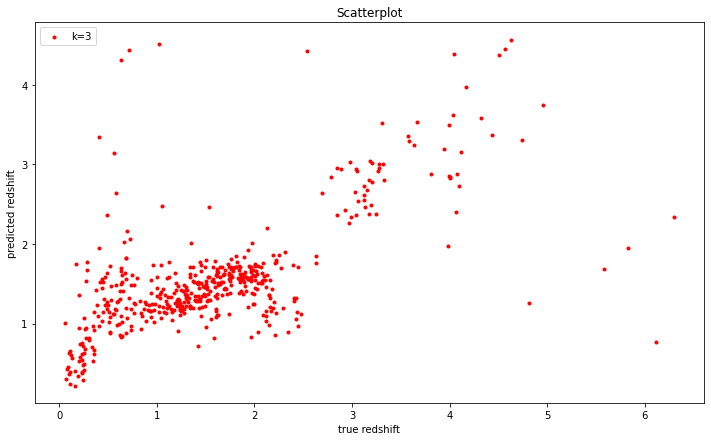

In [6]:
NeighborModel = NearestNeighborRegressor(n_neighbors=15)
NeighborModel.fit(X_train, t_train)
neighbor_train = [] 
neighbor_test = []

for x in X_train:
    neighbor_train.append(NeighborModel.getKNeighbors(x))
for t in X_test:
    neighbor_test.append(NeighborModel.getKNeighbors(t))
neighbor_train = np.array(neighbor_train)
neighbor_test = np.array(neighbor_test)

linRegModel = LinearRegression()
linRegModel.fit(neighbor_train, t_train)

fForxPredection = linRegModel.predict(neighbor_test)

rmseValue = NeighborModel.RMSE(t_test, fForxPredection)
print("The rmse-value is:", rmseValue)
plt.figure(figsize=(12,7))
plt.title("Scatterplot")
plt.xlabel('true redshift')
plt.ylabel('predicted redshift')
plt.scatter(t_test, fForxPredection, color='red', label="k=3", marker=".")
plt.legend(loc=2)
plt.savefig("plot4c.png")
plt.show()
